In [ ]:
!pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.8 MB/s eta 0:00:00


In [ ]:
import random
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
eScooterDemand_00 = pd.read_csv('drive/MyDrive/Colab Notebooks/eScooterDemand.csv')

Mounted at /content/drive


# Exploring the data

In [ ]:
eScooterDemand_00.head()

,Date,Count,Hour,Temp,Humidity,Wind speed,Visibility,Dew point,Sunshine,Rain,Snow,Season,Public Holiday,HireAvailable
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No,Yes


In [ ]:
eScooterDemand_00.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            8760 non-null   object 
 1   Count           8760 non-null   int64  
 2   Hour            8760 non-null   int64  
 3   Temp            8760 non-null   float64
 4   Humidity        8760 non-null   int64  
 5   Wind speed      8760 non-null   float64
 6   Visibility      8760 non-null   int64  
 7   Dew point       8760 non-null   float64
 8   Sunshine        8760 non-null   float64
 9   Rain            8760 non-null   float64
 10  Snow            8760 non-null   float64
 11  Season          8760 non-null   object 
 12  Public Holiday  8760 non-null   object 
 13  HireAvailable   8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ KB


In [ ]:
df1 = eScooterDemand_00.groupby("Season")
df1.agg("count")

,Date,Count,Hour,Temp,Humidity,Wind speed,Visibility,Dew point,Sunshine,Rain,Snow,Public Holiday,HireAvailable
Season,,,,,,,,,,,,,
Autumn,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184
Spring,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208
Summer,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208
Winter,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160


In [ ]:
df2 = eScooterDemand_00.groupby("Public Holiday")
df2.agg("count")

,Date,Count,Hour,Temp,Humidity,Wind speed,Visibility,Dew point,Sunshine,Rain,Snow,Season,HireAvailable
Public Holiday,,,,,,,,,,,,,
No,8328,8328,8328,8328,8328,8328,8328,8328,8328,8328,8328,8328,8328
Yes,432,432,432,432,432,432,432,432,432,432,432,432,432


In [ ]:
eScooterDemand_00.describe(include='all')

,Date,Count,Hour,Temp,Humidity,Wind speed,Visibility,Dew point,Sunshine,Rain,Snow,Season,Public Holiday,HireAvailable
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [ ]:
# Count and display the number of missing values in each column of the DataFrame
eScooterDemand_00.isnull().sum()

Date              0
Count             0
Hour              0
Temp              0
Humidity          0
Wind speed        0
Visibility        0
Dew point         0
Sunshine          0
Rain              0
Snow              0
Season            0
Public Holiday    0
HireAvailable     0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot trends by numerical features

By examining the trends from the scatter plots, we can visually investigate the trends for how weather-related factors (temperature, humidity, etc) might influence e-scooter demand, i.e., whether these factors impact the usage of e-scooters.

By looking for patterns, we can see which weather conditions are more favourable for e-scooter usage. For example, from the scatter plots we can see when temperature rises, the count of e-scooter rentals tends to increases. We can also see that when it's not raining or snowing there is signficant more usage of e-scooters compared to when it is rains or snows.

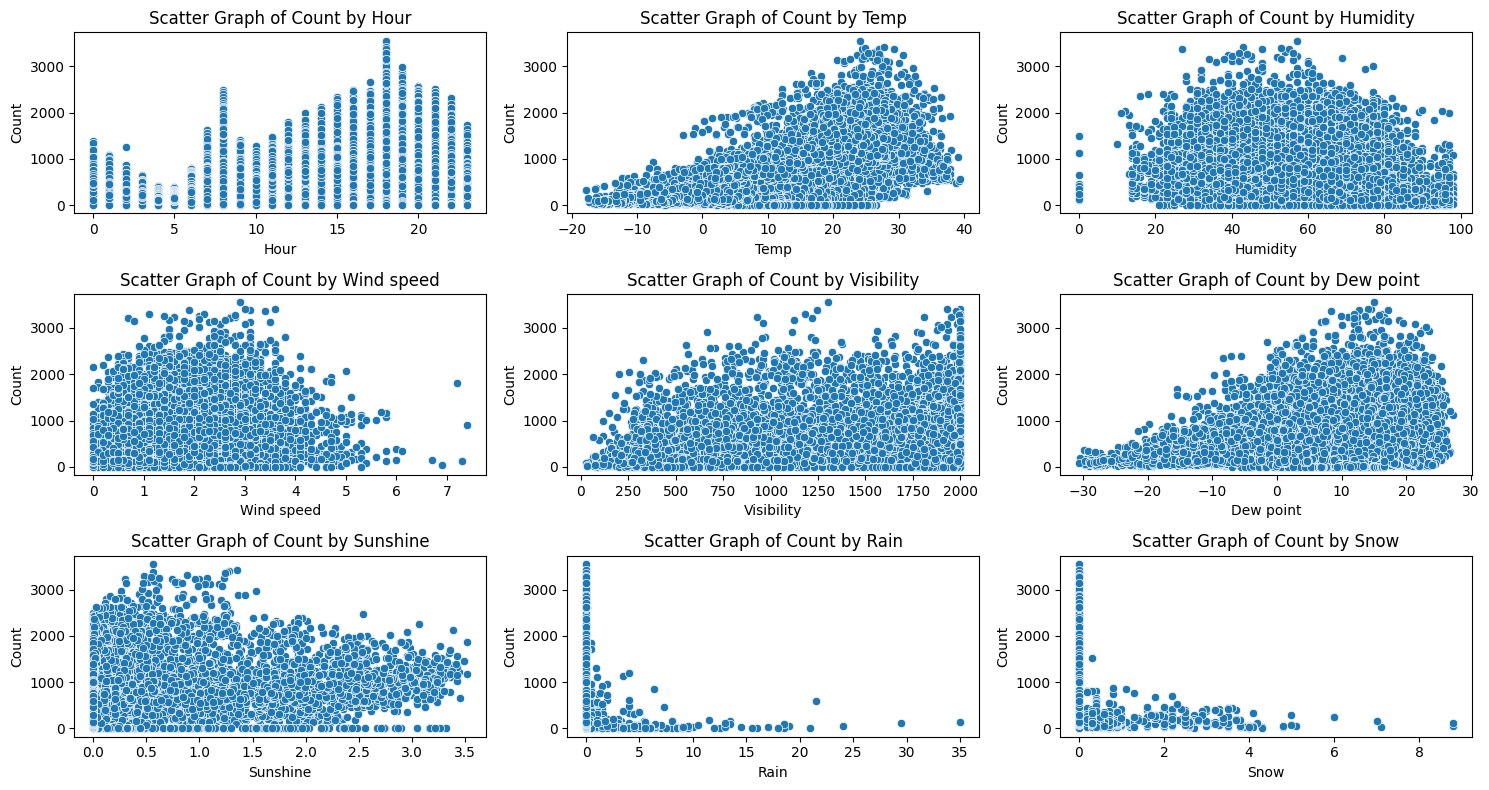

In [ ]:
numerical_features = [col for col, dtype in eScooterDemand_00.dtypes.items() if dtype in ['int64', 'float64'] and col != 'Count']
len(numerical_features)

# numerical_features = ['Hour', 'Temp', 'Humidity', 'Wind speed', 'Visibility', 'Dew point', 'Sunshine', 'Rain', 'Snow']

plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(y='Count', x=feature, data=eScooterDemand_00)
    plt.title(f'Scatter Graph of Count by {feature}')

plt.tight_layout()
plt.show()

As you can see from the scatter plot of Temperature and Dew Point, they are highly correlated. When Temperature increases, Dew point increases as well, showing a strong linear relationship between the two. This may provide redundant information, therefore one of these has to be removed to improve the models performance.

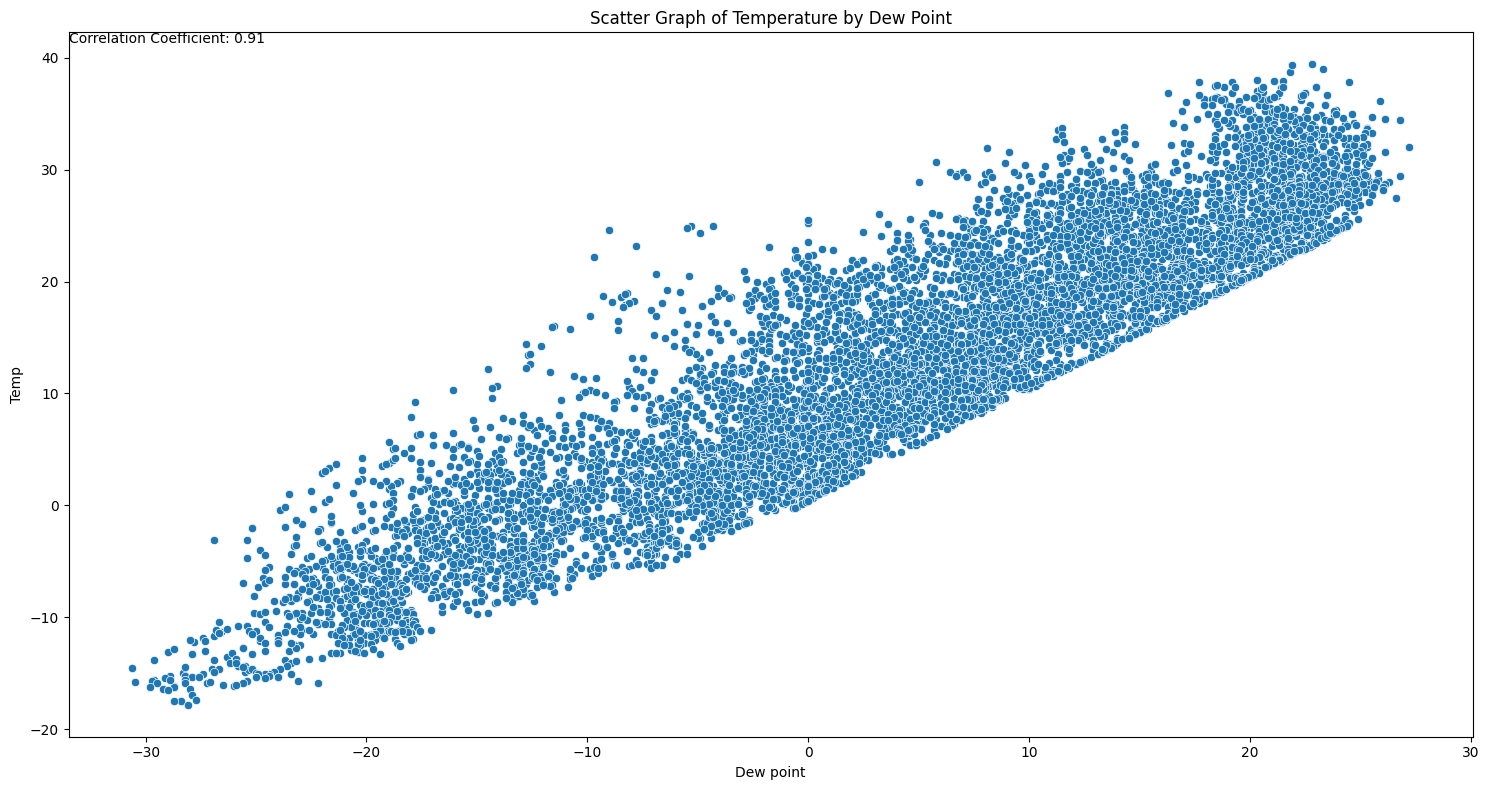

In [ ]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='Dew point', y='Temp', data=eScooterDemand_00)
plt.title('Scatter Graph of Temperature by Dew Point')
plt.tight_layout()
correlation_coefficient = np.corrcoef(eScooterDemand_00['Dew point'], eScooterDemand_00['Temp'])[0, 1]
plt.text(plt.xlim()[0], plt.ylim()[1], f'Correlation Coefficient: {correlation_coefficient:.2f}', verticalalignment='top')
plt.show()

# BoxPlot of count by categorical features

By examining the boxplots below it can show if any of the categorical features (Season, Public Holiday and HireAvailable) have any relationships with the count of eScooters hired.

For example, we can see how the count varies across the different categories of 'Season'. We can see that there is significantly more demand in summer than in winter, maybe due to warmer weather in the summer so more people being outside.  

From the boxplot of Count by Public holiday, we can see that on average there are more e-scooter rentals when it is not a public holiday. This may be because there are more users taking the e-scooters to work etc, however this is just an assumption.

The boxplot of Count by HireAvailable compares the count of eScooter demand for scenarios where the hire availability is either "Yes" or "No". Form the plot, it is clear that when hire is available (Yes), there is a range of counts observed, showing varying demand levels. However, when hire is not available (No), the count is consistently 0. Therefore, focusing on scenarios where hire is available would be more meaningful for analysing and predicting eScooter demand.

Overall, this can help guide decision-making processes, such as just focusing on HireAvailable yes to improve model performance.

['Season', 'Public Holiday', 'HireAvailable']


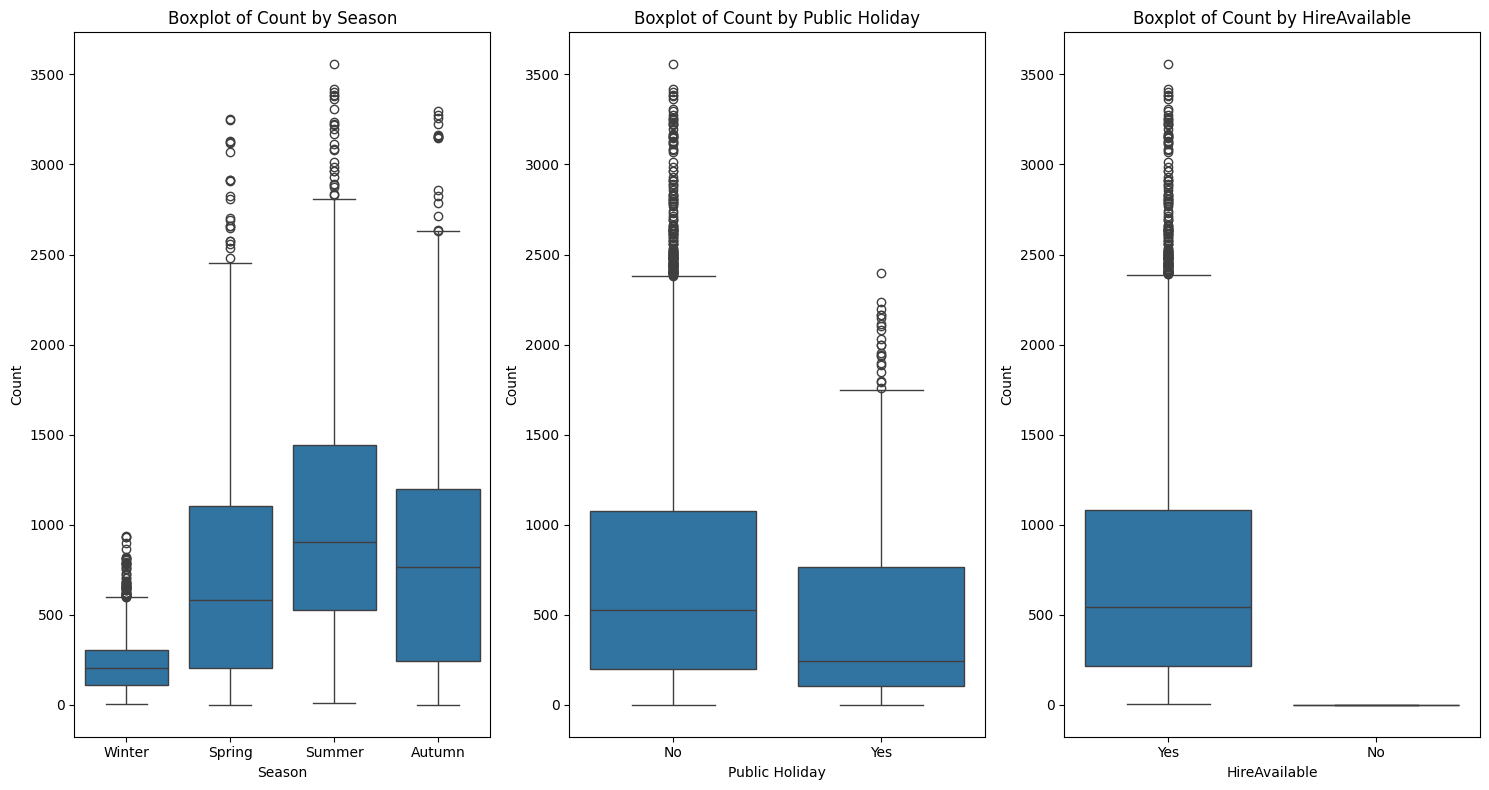

In [ ]:
# Extracting categorical variables
categorial_cols = [col for col, dtype in eScooterDemand_00.dtypes.items() if dtype == 'object'and col != 'Date']
# List all categorical variables
print(categorial_cols)

plt.figure(figsize=(15, 8))
for i, feature in enumerate(categorial_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=feature, y='Count', data=eScooterDemand_00)
    plt.title(f'Boxplot of Count by {feature}')

plt.tight_layout()
plt.show()

# Preparing the data I
Data is prepared by transforming raw data into informative representation, allowing the machine learning model to extract meaningful patterns and make accurate predictions for e-scooter demand.

The 'Date' column is dropped because it is irrelevant to the daily e-scooter demand prediction, it does not directly contribute to the variation in e-scooter demand, so can be excluded from the predictive model.

From the above boxplot, it clearly shows that there is no data when HireAvailable is set to 'No'. So they are excluded using filter, and then dropping HireAvailable columns from the data. By excluding instances where e-scooters are unavailable for hire, any potential bias from periods with no available e-scooters is mitigated. This ensures that the model focuses solely on understanding and predicting demand patterns during operational hours, without being influenced by non-operational periods.

In [ ]:
# rename specific columns in DataFrame (eScooterDemand_00) for better readability - following pythons snake case rule
eScooterDemand_0 = eScooterDemand_00.rename(columns = {"Wind speed": "Wind_Speed", "Dew point": "Dew_Point", "Public Holiday": "Public_Holiday"})

# filters data to only include rows where 'HireAvailable' is yes, then drops column since its no longer needed for prediction
# also drops 'Date' column, as it is not directly relevant to daily demand prediction
eScooterDemand_1 = eScooterDemand_0[eScooterDemand_0["HireAvailable"] == "Yes"]\
                .drop("HireAvailable", axis = 1)\
                .drop(["Date"], axis=1)


# Preparing the data II
The min-max scaling method is used to scale the numerical features in the dataset between a fixed range of 0 and 1. This scaling approach is chosen because it preserves the original distribution of the data while ensuring that all features are on a comparable scale, i.e., equal weights. By bringing all features within the same range, min-max scaling prevents certain features from dominating others due to their large numerical values. Therefore, min-max is applied to enhance the performance and convergence of machine learning algorithms while preserving the original dataset distribution.  

We perform one-hot encoding for categorical features such as 'Season' and 'Public_Holiday' to prepare the data for input into the neural network. Since neural networks require numerical input data, one-hot encoding is used to convert categorical variables into a binary format. This approach ensures that the model can effectively interpret and learn from these categorical attributes.

For instance, in the 'Season' column, we create separate binary columns ('Season_Spring', 'Season_Summer', 'Season_Autumn', and 'Season_Winter') to represent each season. If a sample corresponds to a specific season, the corresponding binary column will have a value of 1, while the others will have a value of 0.

Similarly, we encode the 'Public_Holiday' column into binary features, indicating whether a particular day is a public holiday or not.

Additionally, the 'Rain' and 'Snow' columns are transformed into binary categorical features. A value greater than 0 in these columns indicates the presence of rain or snow, respectively, resulting in the corresponding binary feature being set to 1; otherwise, it is set to 0. This transformation is justified by the significant discrepancy observed in the data distribution between instances with and without precipitation, as shown in the scatter plots.

Furthermore, we drop the original categorical columns from the dataset after performing one-hot encoding since they have been replaced by the new binary columns. Additionally, we remove the 'Dew_Point' column due to its strong correlated with 'Temperature,' as observed in the scatterplots above. This helps reduce redundant information and improve the model's performance.

This is then converted into a NumPy array as required for further processing in the evolving MLP model.

In [ ]:
# creates a list of column names containing numerical data types - numerical features like temperature, hour, etc
numeric_cols = [col for col, dtype in eScooterDemand_1.dtypes.items() if dtype in ['int64', 'float64'] and col != 'Count']

# creates a list of column names containing categorical data types - non-numerical features like seasons or holidays
categorial_cols = [col for col, dtype in eScooterDemand_1.dtypes.items() if dtype == 'object']

# In order to scale numerical features, e-scooter data is split into three parts by their characteristic
eScooterDemand_numVar_0 = eScooterDemand_1[numeric_cols].copy()
eScooterDemand_catVar = eScooterDemand_1[categorial_cols].copy()
eScooterDemand_depVar = eScooterDemand_1[['Count']].copy()

# performs min-max scaling on numerical features
# normalises values between 0 and 1, which is beneficial for NN machine learning alogrithms to achieve higher accuracy
eScooterDemand_numVar_1 = (eScooterDemand_numVar_0 - eScooterDemand_numVar_0.min()) / (eScooterDemand_numVar_0.max() - eScooterDemand_numVar_0.min())
eScooterDemand_numVar = (eScooterDemand_numVar_1)

# concatanate data back together
eScooterDemand_1 = pd.concat([eScooterDemand_numVar, eScooterDemand_catVar], axis=1)
eScooterDemand_1 = pd.concat([eScooterDemand_1, eScooterDemand_depVar], axis=1)

# Generating the final data
eScooterDemand = (eScooterDemand_1).copy()
eScooterDemand.count()

# Drop count
inputs_0 = eScooterDemand.drop(columns=["Count"])

# performs one hot encoding on categorical features (Season and Public_Holiday)
inputs_0['Season_Spring'] = np.where(eScooterDemand['Season'] == 'Spring', 1, 0)
inputs_0['Season_Summer'] = np.where(eScooterDemand['Season'] == 'Summer', 1, 0)
inputs_0['Season_Autumn'] = np.where(eScooterDemand['Season'] == 'Autumn', 1, 0)
inputs_0['Season_Winter'] = np.where(eScooterDemand['Season'] == 'Winter', 1, 0)
inputs_0['Public_Holiday_Yes'] = np.where(eScooterDemand['Public_Holiday'] == 'Yes', 1, 0)

# convert Rain and Snow columns into binary categorical features (Rain_Cat and Snow_Cat)
inputs_0['Rain_Cat'] = np.where(eScooterDemand['Rain'] > 0, 1, 0)
inputs_0['Snow_Cat'] = np.where(eScooterDemand['Snow'] > 0, 1, 0)

# drops original categorical columns since they have been converted into one-hot encoding features
inputs_0.drop(columns=["Season", "Public_Holiday", "Rain", "Snow", "Dew_Point"], inplace=True)
print(inputs_0.columns)

# convert to NumPy array for dependent and independent variables
inputs = inputs_0.to_numpy()
outputs = eScooterDemand['Count'].to_numpy().reshape(-1)

print(f"Number of input data is : {len(inputs)}")
print(f"Number of output data is : {len(outputs)}")

Index(['Hour', 'Temp', 'Humidity', 'Wind_Speed', 'Visibility', 'Sunshine',
       'Season_Spring', 'Season_Summer', 'Season_Autumn', 'Season_Winter',
       'Public_Holiday_Yes', 'Rain_Cat', 'Snow_Cat'],
      dtype='object')
Number of input data is : 8465
Number of output data is : 8465


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# splits data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.2, random_state=42)

In [ ]:
import random

# Defining the neural network

The code defines a single-hidden layer multiple layer perceptron (MLP) neural network for predicting e-scooter demands. The input layer has the same number of nodes as the number of input features. The number of hidden nodes can be changed during the model training to improve the MLP performance, the number of output nodes is equal to the predictive variable. In this project, (15, 4, 1) MLP is used.

The network uses weights to connect the input layer to the hidden layer and the hidden layer to the output layer. These weights are the parameters that the genetic algorithm optimises to enhance the predictive capability of the neural network.

Each node in the hidden layer uses the ReLu activation function, allowing it to model complex relationships in the data. The output layer also applies a ReLu activation function. This choice of activation function is suitable for regression tasks like this, as it allows the network to output continuous values between (0, +infinity).

Then the functions 'getWeightsLinear' and 'setWeightsLinear' allow the GA to get and set theweights as a simple 1D list. This means we can then work with the built-in operators without needing to worry about defining our own to work with multidimensional arrays.

The neural network becomes better and better at capturing patterns and making accurate predictions

In [ ]:
class MLP(object):
    def __init__(self, numInput, numHidden, numOutput):
        self.fitness = 0
        self.numInput = numInput + 1 # Add bias node to inputs
        self.numHidden = numHidden
        self.numOutput = numOutput

        self.wh = np.random.randn(self.numHidden, self.numInput)
        self.wo = np.random.randn(self.numOutput, self.numHidden)

        self.ReLU = lambda x : max(0,x)
        # self.sigmoid = lambda x : 1 /(1 - exp(-x))
        # self.tanh = lambda x : - 1 / (1 + exp(-x))

    def linear(self,x):
        try:
            ans = x
        except OverflowError:
            ans = float('inf')
        return ans

class MLP(MLP):
    def feedForward(self, inputs):
        inputsBias_0 = inputs.tolist()
        inputsBias_0.insert(len(inputs),1)                 # Add bias input
        inputsBias = np.array(inputsBias_0)
        h1 = np.dot(self.wh, inputsBias)                 # feed to hidden layer
        h1 = [self.ReLU(x) for x in h1]              # Activate hidden layer
        # h1 = [self.tanh(x) for x in h1]
        # h1 = [self.sigmoid(x) for x in h1]
        output = np.dot(self.wo, h1)                 # feed to output layer
        output = [self.ReLU(x) for x in output]   # Activate output layer
        return output

class MLP(MLP):

    def getWeightsLinear(self):
        flat_wh = list(self.wh.flatten())
        flat_wo = list(self.wo.flatten())
        return( flat_wh + flat_wo )

    def setWeightsLinear(self, Wgenome):
        numWeights_IH = self.numHidden * (self.numInput)
        self.wh = np.array(Wgenome[:numWeights_IH])
        self.wh = self.wh.reshape((self.numHidden, self.numInput))
        self.wo = np.array(Wgenome[numWeights_IH:])
        self.wo = self.wo.reshape((self.numOutput, self.numHidden))

myNet = MLP(13,16,1)

# a = myNet.getWeightsLinear()
# print(f"The original output layer weight is : {myNet.wo}")
# myNet.setWeightsLinear(a)
# print(f"The weight in the output layer after weight reset is :{myNet.wo}")

# inputs = np.array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0])

# outcome = myNet.feedForward(X_train[0])
# print(outcome)

In [ ]:
import operator
import math
import random
import numpy

from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import gp

In [ ]:
IND_SIZE = myNet.numInput * myNet.numHidden + myNet.numHidden * myNet.numOutput

# Representation of individuals

Each individual in the population represents candidate solution which contains a list of floating-point numbers representing the weights of the neural network. The size of an individual (IND_SIZE) is determined by the total number of weights, calculated as the sum of the products of the number of input nodes and hidden nodes, and the number of hidden nodes and output nodes.

Through this design, the genetic algorithm can directly optimise the weights of the neural network to achieve the better performance in the prediction. Each weight is initialised with a random floating-point number within the range of -1 to 1.

The choice of 'FitnessMin' from the 'creator' module ensures that the genetic algorithm aims to minimise the fitness function (fitness weight is -1). In the context of this problem, minimising the fitness function translates to reducing the prediction error between the predicted e-scooter demand and the actual demand. Therefore, individuals with lower fitness values, indicating smaller prediction errors, are favoured during the evolutionary process. This minimisation objective is driven by the genetic algorithm to find the global minimum of the fitness to get the best weights for the NN that yield the highest prediction accuracy.

# Justification for representation

Representing individuals as weights of an MLP provides flexibility in evolving complex non-linear mappings, using ReLU, between input features (weather data) and output predictions (e-scooter demand). In the real world, weather patterns and their impact on e-scooter demand are often complex and non-linear. For example, a slight increase in temperature might not significantly impact demand, but a larger increase could lead to surge in demand. Similarly, the combined effect of temperature and humidity might have a greater infleunce than either factor on its own. Therefore, while some weather features may have a somewhat linear correlation with demand, the overall relationship is likely not a straight line. MLPs can therfore capture these non-linear patterns in the data due to the application of the activation function here.

The chosen representation of individuals as MLP weights also offers significant advantages in terms of scalability. This approach utilises a fixed-length vector, whose size is determined by the predefined network architecture. This simplifies the implementation of genetic operators and the evaluation process, as they remain unchanged regardless of modifications to the number of hidden layers of nodes per layer. When scaling the network, the fixed-length vector automatically adjusts to accommodate the additional weights from the new connections. This eliminates the need for code changes in the genetic algorithm, allowing for each experimentation to optimise performance. Overall, the fixed-length vector representation provides a scalable and efficient solution for evolving MLPs using GA.


In [ ]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, -1, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=IND_SIZE)

# Evaluation function

The 'evaluate' function is responsible for assessing the fitness of an individual within the context of a neural network, particularly in the context of predicting e-scooter demand.

The function evaluates the fitness which is the average sum squared the prediction error of an individual. The individual is passed to MLP to work as the weights. The modified MLP is used to calculate the output for each input. The MLP output is compared with the actual output to get the prediction error, which is squared to get the square error. The sum of all squared error is divided by the length of the actual output to get the average sum of squared error, i.e., fitness value.

The sum of squared differences is commonly used as a measure of prediction error in regression problems, where the goal is to minimise the differnce between predicted and true values. Squaring the differences emphasises larger errors, which can be useful for penalising significant deviations between the predicted and true outputs.

Using this approach aligns with the problem of predicting e-scooter demand, where accuractely estimating demand levels is crucial.

Originally, the evaulation function I used was calcualting the Mean Absolute Error (MAE). This is another commonly used metric for regression problems, however the chosen approach (sum of squared differences) was more appropriate for the problem, leading to better optimisation outcomes during the evolutionary process.

In [ ]:
def evaluate(indiv, myNet, inputs, outputs):
  myNet.setWeightsLinear(indiv)
  predicted_outputs = [myNet.feedForward(in0) for in0 in inputs]
  fitness_sse = np.array(
        [(i - j) ** 2 for i, j in zip(outputs, predicted_outputs)]
        ).sum()
  fitness = np.sqrt(fitness_sse) / len(outputs) # Sum of squared error

  return fitness,

# def evaluate(indiv, myNet, inputs, outputs):
#     myNet.setWeightsLinear(indiv)
#     predictions = [myNet.feedForward(indInput) for indInput in inputs]
#     error = np.mean(np.abs([(i - j) for i, j in zip(outputs, predictions)]))  # Absolute value of MAE
#     return error,

In [ ]:
# Check if the current_best_individual is better of equal to the expected.
def check_termination_condition(gen_min_fitness, generation_count):
    if (generation_count == NGEN) or (gen_min_fitness[generation_count][1] < 0.5) or (generation_count > 3 and abs(gen_min_fitness[generation_count][1] - gen_min_fitness[generation_count - 3][1]) <= 0.0000001):
        return True
    else:
        return False

# Selection, crossover and mutation

The selection operator, 'tools.selTournament', picks individuals from the current population based on their fitness, ensuring that fitter ones have a higher chance of reproduction through a tournament style competition. The 'tournsize' paramter set to 10, defines the number of individuals competing in each tournament, this strikes a balance between selecting the fittest individuals and allowing for some diversity in the selection process. Overall, this is used due to its balanced exploration of solutions and exploitation of known good solutions. It gives less fit individuals a chance to contribute, potentially preventing premature convergence.

Crossover, managed by 'tools.cxTwoPoint', mixes genetic material from two parents to produce offspring with traits from both, which can potentially lead to the generation of new and diverse solutions. This is good for the GA as it tends to preserve meaningful weights that contribute to good fitness, and helps the algorithm converge towards optimal solutions more efficiently.

Mutation, implemented as 'tools.mutGaussian', introduces random changes to individual weight, fostering diversity within the population. Using a Gaussian distribution, random values are added to each weight in an individual with a predefined probability of 0.2, this allows for some exploration of new solutions without excessibely disrupting existing good solutions. This stochastic process allows for small, random changes in the MLP weights, allowing exploration of new genetic variants and potentially finding better solutions for the problem.

The population, instantiated with 'toolbox.population', defines how the initial population of individuals is generated in the genetic algorithm. It creates a population of individuals by repeatedly calling the function responsible for generating a single individual and storing them all into a list.

In [ ]:
toolbox.register("evaluate", evaluate)
toolbox.register("select", tools.selTournament, tournsize=10)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0.0, sigma=0.5, indpb=0.2)

In [ ]:
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# The Genetic Algorithm
The implemented algorithm is a Genetic Algorithm (GA) that leverages elements of evolutionary statergies for optimising the weights of a Multi-Layer perceptron (MLP) neural network to predict e-scooter demands.

The GA begins by initializing a population of individuals from the weights generated randomly for the MLP. The population size, controlled by the variable 'POPSIZE,' can be adjusted experimentally to potentially enhance overall performance. Each individual in the population undergoes evaluation using the fitness function 'evaluate()' to assess its performance on the training data. Lower fitness values indicate better performance, as the objective is to minimize prediction errors.

The selection operator 'toolbox.select' identifies individuals from the current population based on their fitness values, employing tournament selection to favor fitter individuals for reproduction. Selected individuals undergo crossover with a probability determined by the crossover probability ('CXPB'). This parameter can be adjusted experimentally to optimize performance. Two-point crossover ('toolbox.mate') facilitates the exchange of genetic material between selected individuals, generating offspring with traits inherited from both parents.

Offspring resulting from crossover may undergo mutation with a probability determined by the mutation probability ('MUTPB'). This parameter, adjustable for experimentation, provides the likelihood of mutation occurrences. Gaussian mutation ('toolbox.mutate') introduces small random changes to individual weights, facilitating exploration of different possibilities within the search space to potentially discover improved solutions.

The offspring and mutated individuals replace the least fit individuals in the current population, maintaining a constant population size. The algorithm iterates through a predefined number of generations ('NGEN') or until a termination condition is met. Adjusting the number of generations can influence performance. The termination condition monitors convergence or significant improvements in fitness values."

# Justification of Genetic Algorithm evolving a neural network

Generally, neural networks use backpropogation (BP) or reinforcement learning (RL) to find the best weight. However for the objective function to be optimised it can be very complecatd with a lot of local optimas. The main issue with BP and RL is that it might converge to the local optima instead of the global optima. Evolutionary algorithms with GA overcomes the shortage of BP and RL. It will always find the global optima no matter how complicated the objective function.

Genetic Algorithms (GAs) are well-suited for optimisation problems where the search space is complex and continuous, like optimising the weights of a Multi-Layer Perceptron (MLP) for e-scooter demand prediction. E-scooter demand is likely influenced by various factors, and the relationships between these factors can be complex and non-linear. GAs excel at exploring such complex search spaces, allowing the MLP to potentially capture these intricate relationships and improve prediction accuracy by optimising its weights to its best.

While GA's offer flexibility, their performance depends on carefully chosen parameters like population size, crossover and mutation rates. Finding the optimal settings require lots and lots of experimentation, which demonstrates a deeper understanding of the algorithms limitations. While current settings may provide good results, there is always potential for more improvements by exploring different parameter configurations.



In [ ]:
stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

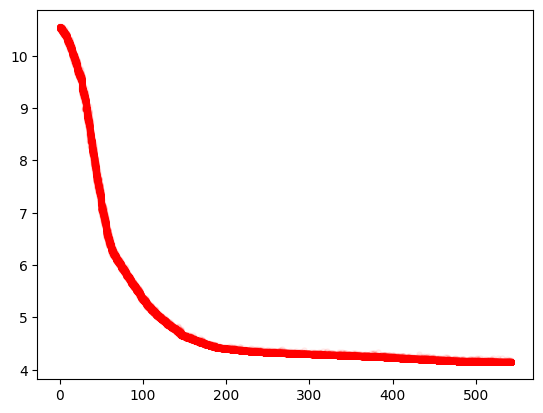

In [ ]:
from IPython import display

logbook = tools.Logbook()

POPSIZE = 200
pop_0 = toolbox.population(POPSIZE)
pop = pop_0.copy()
CXPB = 0.5
NGEN = 600
MUTPB = 0.3

fitness = [toolbox.evaluate(indiv, myNet, inputs, outputs) for indiv in pop]
print(min(fitness))
for ind, fit in zip(pop, fitness):
    ind.fitness.values = fit
gen_min_fitness = []
for g in range(NGEN):
    print("-- Generation %i --" % g)

    offspring = toolbox.select(pop, len(pop))
    offspring
    offspring = list(map(toolbox.clone, offspring))
    offspring

    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < CXPB:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

    for mutant in offspring:
        if random.random() < MUTPB:
            toolbox.mutate(mutant)
            del mutant.fitness.values

    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = [toolbox.evaluate(indiv, myNet, inputs, outputs) for indiv in invalid_ind]
    print(min(fitnesses))
    gen_min_fitness.append([g, min(fitnesses)[0]])

    for ind, fit in zip(invalid_ind, fitnesses):
         ind.fitness.values = fit

    pop[:] = offspring
    record = stats.compile(pop)
    logbook.record(gen=g, **record)

    gen = [g] * POPSIZE
    plt.scatter(gen, [ind.fitness.values for ind in pop], color='red', s=15, alpha=0.05)
    display.display(plt.gcf())
    display.clear_output(wait=True)

    termination = check_termination_condition(gen_min_fitness, g)
    if termination == True:
      break
    else:
      pass

In [ ]:
logbook.header = "gen", "avg", "evals", "std", "min", "max"

In [ ]:
%matplotlib inline
gen = logbook.select("gen")
avgs = logbook.select("avg")
stds = logbook.select("std")

Text(0, 0.5, 'Mean Fitness')

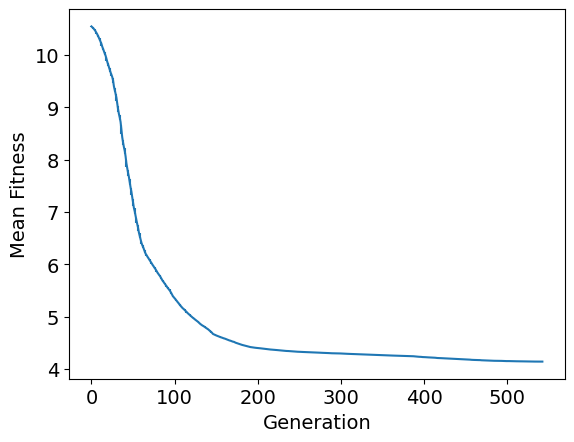

In [ ]:
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)

fig, ax1 = plt.subplots()
#line1 = ax1.plot(gen, avgs)
line1 = ax1.errorbar(gen, avgs, yerr=stds, errorevery=2)
ax1.set_xlabel("Generation")
ax1.set_ylabel("Mean Fitness")

# Investigation of parameters and representation

Here we use different performance metrics, such as Train R-Square, Test R-Square, Train Best Fitness and Test Best Fitness to gain insights into the optimal configurations for the neural network model trained with the genetic algorithm. Currently we are keeping all of the parameters the same and just adjusting the number of hidden layers to see how it affects the models performance in terms of R-squared values on both training and test datasets.

R-Squared is a stastical measure that represents the proportion of the variance in the dependent variable that is explained by the independent variables in a regression model. It is calculated using the formula: R^2 = 1 - SSR/SST, where SSR is the sum of squared regression and SST is the sum of squared total. Using R-Squared provides an intuitve interpretation of the proportion of variance explained by the model. For example, a R-Sqaured of 0.75 means that 75% of the variability in the depenent variable is explained by the independent variables in the model. Therefore using this we can evaluate the performance of the neural network model trained using genetic algorithm.

- Train R Square: R-Squared value calculated on the training dataset after training the neural network.
- Test R Square: R-Squared value calculated on the test dataset after training the neural network.
- Train Best Fitness: Fitness value calculated based on the training dataset's predictions.
- Test Best Fitness: Fitness values calculated based on the test dataset's predictions.

From the table below, we can see that using 16 hidden layers, provides the performance metrics with a training best fitness of 4.12 (2dp) and 66.55 (2dp) test R-square.

The scatterplot below shows the best number of hidden layers which provide the best fitness over multiple generations.

However, we can then adjust the parameters such as 'POPSIZE', 'NGEN', 'MUTPB' and 'CXPB' to get even more optimal configurations for the neural network.

In [ ]:
indiv1 = tools.selBest(pop, 1)[0]
myNet.setWeightsLinear(indiv1)

In [ ]:
# Train R Square

pred_outputs = [myNet.feedForward(input0) for input0 in X_train]
Y_mean = np.mean(y_train)
SST = np.array([(i - Y_mean) ** 2 for i in y_train]).sum()
SSR = np.array([(i - j) ** 2 for i, j in zip(pred_outputs, y_train)]).sum()
R_Square = (1 - (SSR / SST)) * 100
print("Train R Square: ", R_Square)

Train R Square:  64.51160418668786


In [ ]:
# Test R Square
pred_outputs = [myNet.feedForward(input0) for input0 in X_test]
Y_mean = np.mean(y_test)
SST = np.array([(i - Y_mean) ** 2 for i in y_test]).sum()
SSR = np.array([(i - j) ** 2 for i, j in zip(pred_outputs, y_test)]).sum()
R_Square = (1 - (SSR / SST)) * 100
print("Test R Square: ", R_Square)

Test R Square:  66.29112304463371


In [ ]:
# Train best fitness
print("Train best fitness: ", ind.fitness.values[0])

Train best fitness:  4.147273090703987


In [ ]:
# Test best fitness
bestFitness = np.sqrt(SSR) / len(y_test)
print("Test best fitness: ", bestFitness)

Test best fitness:  8.841201066630143


In [ ]:
columns = ['Parameters', 'Run 1', 'Run 2', 'Run 3', 'Run 4']
data = [['POPSIZE', '200', '200', '200', '200'],
        ['NGEN', '500', '500', '500', '500'],
        ['MUTPB', '0.3', '0.3', '0.3', '0.3'],
        ['CXPB', '0.5', '0.5', '0.5', '0.5'],
        ['Hidden nodes', '4', '8', '12', '16'],
        ['Train Best fitness', '4.213522392876443', '4.221411259638234', '4.130411035654002', '4.1235480658963715'],
        ['Train R_Square', '63.20882025210448', '63.133667538363284', '64.71229977721187', '64.89721661970125'],
        ['Test Best Fitness', '8.989564906874982', '9.036032169168788', '8.843618298076597', '8.808419243678403'],
        ['Test R_Square', '65.15029598171995', '64.78908703889236', '66.27268815199527', '66.54063434317418']
        ]

statistics = pd.DataFrame(data, columns=columns)
statistics

,Parameters,Run 1,Run 2,Run 3,Run 4
0,POPSIZE,200,200,200,200
1,NGEN,500,500,500,500
2,MUTPB,0.3,0.3,0.3,0.3
3,CXPB,0.5,0.5,0.5,0.5
4,Hidden nodes,4,8,12,16
5,Train Best fitness,4.213522392876443,4.221411259638234,4.130411035654002,4.1235480658963715
6,Train R_Square,63.20882025210448,63.133667538363284,64.71229977721187,64.89721661970125
7,Test Best Fitness,8.989564906874982,9.036032169168788,8.843618298076597,8.808419243678403
8,Test R_Square,65.15029598171995,64.78908703889236,66.27268815199527,66.54063434317418


# Adjusting crossover probability

Here we can adjust the crossover probability from 0.5 - 0.9 and then run the genetic algorithm evolving the neural network. With each run we can see the difference in Train best fitness, train R_Square, Test best fitness and test R_Square. From the results we can see that a 0.8 crossover probability yields the highest accuracy and lowest fitness, however this is not the best fit for this project as it introduces overfitting. Therefore to determine the best crossover probability, we would need to look at the prediction graphs below. From this we can see that sticking with 0.5 provides the best accuracy and lowest fitness without overfitting.

In [ ]:
# adjusting crossover probability
columns = ['Parameters', 'Run 1', 'Run 2', 'Run 3', 'Run 4', 'Run 5']
data = [['POPSIZE', '200', '200', '200', '200', '200'],
        ['NGEN', '500', '500', '500', '500', '500'],
        ['MUTPB', '500', '0.3', '0.3', '0.3'],
        ['CXPB', '0.5', '0.6', '0.7', '0.8', '0.9'],
        ['Hidden nodes', '16', '16', '16', '16', '16'],
        ['Train Best fitness', '4.112568324695102', '4.115494447815609', '4.110073733865943', '4.097723185251675', '4.114583835646852'],
        ['Train R_Square', '65.085675243965127', '65.0629893992836', '65.17027908727479', '65.43105809254541', '64.96828246195591'],
        ['Test Best Fitness', '8.836210204586325', '8.846408429184025', '8.838799636230455', '8.79104488453648', '8.812266937725711'],
        ['Test R_Square', '66.235696320058654', '66.25140309344366', '66.30943244119003', '66.67249947947505', '66.51139651583775']
        ]

statistics = pd.DataFrame(data, columns=columns)
statistics

,Parameters,Run 1,Run 2,Run 3,Run 4,Run 5
0,POPSIZE,200,200,200,200,200
1,NGEN,500,500,500,500,500
2,MUTPB,500,0.3,0.3,0.3,None
3,CXPB,0.5,0.6,0.7,0.8,0.9
4,Hidden nodes,16,16,16,16,16
5,Train Best fitness,4.112568324695102,4.115494447815609,4.110073733865943,4.097723185251675,4.114583835646852
6,Train R_Square,65.085675243965127,65.0629893992836,65.17027908727479,65.43105809254541,64.96828246195591
7,Test Best Fitness,8.836210204586325,8.846408429184025,8.838799636230455,8.79104488453648,8.812266937725711
8,Test R_Square,66.235696320058654,66.25140309344366,66.30943244119003,66.67249947947505,66.51139651583775


# Adjusting mutation probability

Here we adjust the mutation probability between 0.3 - 0.6. However, only a mutation probability of 0.3 works well in this project, as anything higher can cause overfitting, which was seen in the prediction graphs below. Keeping it at 0.3 maintains genetic diversity, prevents overfitting and keeps the performance at a steady level. Higher mutation probabilities increase the risk of overfitting and can lead to less reliable models.  

In [ ]:
# adjusting mutation probability
columns = ['Parameters', 'Run 1', 'Run 2', 'Run 3', 'Run 4']
data = [['POPSIZE', '200', '200', '200', '200'],
        ['NGEN', '500', '500', '500', '500'],
        ['MUTPB', '0.3', '0.4', '0.5', '0.6'],
        ['CXPB', '0.5', '0.5', '0.5', '0.5'],
        ['Hidden nodes', '16', '16', '16', '16'],
        ['Train Best fitness', '4.242478869532711', '4.097723185251675', '4.196755757242165', '4.054569832516542'],
        ['Train R_Square', '62.72317030858455', '65.43105809254541', '64.568945235618964', '65.686214038965423'],
        ['Test Best Fitness', '9.068052832288503', '8.79104488453648', '8.964045308945213', '8.618623054692543'],
        ['Test R_Square', '64.53909357706365', '66.67249947947505', '66.021436458953756', '66.984263159604328']
        ]

statistics = pd.DataFrame(data, columns=columns)
statistics

,Parameters,Run 1,Run 2,Run 3,Run 4
0,POPSIZE,200,200,200,200
1,NGEN,500,500,500,500
2,MUTPB,0.3,0.4,0.5,0.6
3,CXPB,0.5,0.5,0.5,0.5
4,Hidden nodes,16,16,16,16
5,Train Best fitness,4.242478869532711,4.097723185251675,4.196755757242165,4.054569832516542
6,Train R_Square,62.72317030858455,65.43105809254541,64.568945235618964,65.686214038965423
7,Test Best Fitness,9.068052832288503,8.79104488453648,8.964045308945213,8.618623054692543
8,Test R_Square,64.53909357706365,66.67249947947505,66.021436458953756,66.984263159604328


# Adjusting Generation size

Here we can adjust the generation size between 500 - 800. You can see that with more generations the accuracy is better, however with 700 generations and above, the computation time is too large. Causing Google colab to crash runtime before even finishing the run. Therefore with 600 generations it provides the best performance.

In [ ]:
# adjusting mutation probability
columns = ['Parameters', 'Run 1', 'Run 2', 'Run 3', 'Run 4']
data = [['POPSIZE', '200', '200', '200', '200'],
        ['NGEN', '500', '600', '700', '800'],
        ['MUTPB', '0.3', '0.3', '0.3', '0.3'],
        ['CXPB', '0.5', '0.5', '0.5', '0.5'],
        ['Hidden nodes', '16', '16', '16', '16'],
        ['Train Best fitness', '4.242478869532711', '4.147273090703987', 'na', 'na'],
        ['Train R_Square', '62.72317030858455', '64.51160418668786', 'na', 'na'],
        ['Test Best Fitness', '9.068052832288503', '8.841201066630143', 'na', 'na'],
        ['Test R_Square', '64.53909357706365', '66.29112304463371', 'na', 'na']
        ]

statistics = pd.DataFrame(data, columns=columns)
statistics

,Parameters,Run 1,Run 2,Run 3,Run 4
0,POPSIZE,200,200,200,200
1,NGEN,500,600,700,800
2,MUTPB,0.3,0.3,0.3,0.3
3,CXPB,0.5,0.5,0.5,0.5
4,Hidden nodes,16,16,16,16
5,Train Best fitness,4.242478869532711,4.147273090703987,na,na
6,Train R_Square,62.72317030858455,64.51160418668786,na,na
7,Test Best Fitness,9.068052832288503,8.841201066630143,na,na
8,Test R_Square,64.53909357706365,66.29112304463371,na,na


# Evaluation of my solution 1

Note: everything below here uses parameters that yield the best performance

To evaluate the algorithm thoroughly, we have first created a scatterplot to visualise the relationship between the predicted outputs of the neural network model ('pred_outputs') and the actual target values ('y_test') of the test dataset. As you can see there is a big correlation of 0.81, showing the degree of correspondence between the predicted outputs and the actual target values. This correlation provides insights into the models predictive capabilities. Ideally, in a better-performing model, the points on the scatter plot would form a tight cluster around a diagonal line, showing a strong linear relationship between predicted and actual values.

However, in practical scenarios, some degree of variance or scatter is expected due to noise in the data or model limitations (not enough features and feature interactions included). Additionally, further analysis may involve examining specific patterns or outliers in the scatterplot, which would show areas where the model performs well or poorly. This can guide refinements in the training process, or data pre-processing steps to enhance overall performance.


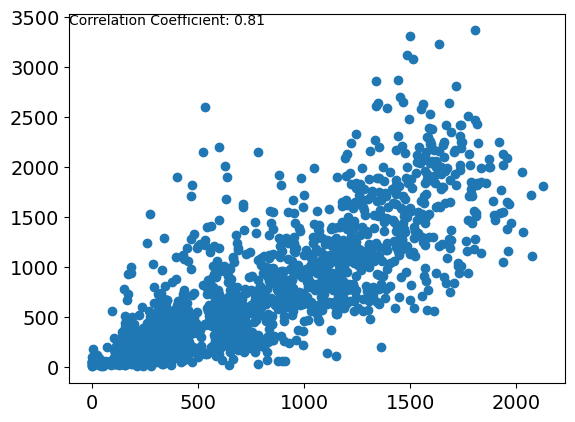

In [ ]:
pred_outputs = [myNet.feedForward(input0) for input0 in X_test]
pred_outputs_flat = np.concatenate(pred_outputs)
plt.plot(pred_outputs_flat, y_test, 'o')
correlation_coefficient = np.corrcoef(pred_outputs_flat, y_test)[0, 1]
plt.text(plt.xlim()[0], plt.ylim()[1], f'Correlation Coefficient: {correlation_coefficient:.2f}', verticalalignment='top')
plt.show()

# Evaluation of my solution 2

Next, we create and prepare our own data to use in the neural network model to make predictions for the count of e-scooters based on weather conditions and time of day. We proceed under the assumption that weather conditions remain consistent within each season. This enables us to utlise the calculated average weather data from the 'eScooterDemand.csv' dataset across different seasons, therefore constructing simulated weather data for our needs.

I have made two datasets for prediction: Winter data and summer data. This is done in a way that the format is exactly the same as dataframe used by the neural network. By using the preprocess_seasonal_data_function, you can easily specify different seasons, designate public holidays as either yes or no, and choose whether it is raining or snowing. This versatility allows the creation of datasets customised to different specifications, providng valuable inputs for prediction and allowing us to explore how different factors influence e-scooter rental counts.

The purpose of creating these datasets is to investigate the effect of specific weather conditions, such as rain, snow and others, on the count of e-scooters hired. By separating the data into winter and summer seasons (as they are completly opposite weather conditions), we can analyse how these create a relation between count. For example, you would expect to see higher e-scooters rented during summer when it is nice and sunny compared to winter when it is raining or snowing.


In [ ]:
def preprocess_seasonal_data(Season_Name, Public_Holiday_Yes, Rain_Cat, Snow_Cat):
  eScooterDropDate = eScooterDemand_00.drop(columns =['Date'])

  # Created data
  featureMinWinter = eScooterDropDate[eScooterDropDate['Season'] == Season_Name].groupby('Hour').min()
  featureMeanWinter = eScooterDropDate[eScooterDropDate['Season'] == Season_Name].drop(columns=["Season", "Public Holiday", "HireAvailable", "Dew point"]).groupby('Hour').mean()
  featureMaxWinter = eScooterDropDate[eScooterDropDate['Season'] == Season_Name].groupby('Hour').max()

  # data scaling to match training and test data
  Hour_original = featureMaxWinter.index
  Hour = featureMaxWinter.index / 24.0
  temp = (featureMeanWinter['Temp'] - featureMinWinter['Temp']) / (featureMaxWinter['Temp'] - featureMinWinter['Temp'])
  humidity = (featureMeanWinter['Humidity'] - featureMinWinter['Humidity']) / (featureMaxWinter['Humidity'] - featureMinWinter['Humidity'])
  windSpeed = (featureMeanWinter['Wind speed'] - featureMinWinter['Wind speed']) / (featureMaxWinter['Wind speed'] - featureMinWinter['Wind speed'])
  visibility = (featureMeanWinter['Visibility'] - featureMinWinter['Visibility']) / (featureMaxWinter['Visibility'] - featureMinWinter['Visibility'])
  sunshine = (featureMeanWinter['Sunshine'] - featureMinWinter['Sunshine']) / (featureMaxWinter['Sunshine'] - featureMinWinter['Sunshine'])

  Df = pd.DataFrame({'Hour': Hour, 'Temp': temp, 'Humidity': humidity, 'Wind_Speed': windSpeed, 'Visibility': visibility, 'Sunshine': sunshine})

  # Adding back in seasons encoded, public holiday encoded as well as binary encoding rain and snow
  Df['Season_Spring'] = 1 if Season_Name == 'Spring' else 0
  Df['Season_Summer'] = 1 if Season_Name == 'Summer' else 0
  Df['Season_Autumn'] = 1 if Season_Name == 'Autumn' else 0
  Df['Season_Winter'] = 1 if Season_Name == 'Winter' else 0
  Df['Public_Holiday_Yes'] = 1 if Public_Holiday_Yes else 0
  Df['Rain_Cat'] = 1 if Rain_Cat == True else 0
  Df['Snow_Cat'] = 1 if Snow_Cat == True else 0

  Df['Sunshine'] = Df['Sunshine'].fillna(0)
  inputs = Df.to_numpy()

  return inputs, Hour_original

inputs_predict_summer_publichol_rain, Hour_original = preprocess_seasonal_data('Summer', True, True, False)
inputs_predict_summer_publichol_norain, _= preprocess_seasonal_data('Summer', True, False, False)
inputs_predict_summer_nopublichol_rain, _ = preprocess_seasonal_data('Summer', False, True, False)
inputs_predict_summer_nopublichol_norain, _= preprocess_seasonal_data('Summer', False, False, False)

inputs_predict_winter_publichol_rain, _ = preprocess_seasonal_data('Winter', True, True, False)
inputs_predict_winter_publichol_norain, _ = preprocess_seasonal_data('Winter', True, False, False)
inputs_predict_winter_nopublichol_rain, _ = preprocess_seasonal_data('Winter', False, True, False)
inputs_predict_winter_nopublichol_norain, _ = preprocess_seasonal_data('Winter', False, False, False)

# Prediction of count

Here we can put the created data into the neural network and predict the number of e-scooter count per hour depending on the different weather conditions using the predict_count function.

As you can see from below, the show_predictions function prints out what the predicted count of e-scooters is each hour depending on the given data.


In [ ]:
def predict_count(inputs, hour_original, label):
    pred_outputs = []

    # passes input data through the neural network model for predictions
    for input_data in inputs:
        prediction = myNet.feedForward(input_data)
        pred_outputs.append(prediction[0])

    predictions_formatted = list(zip(hour_original, pred_outputs))

    return np.array(predictions_formatted)

In [ ]:
def show_predictions(predictions):
    for hour, count in predictions:
        print(f"At {int(hour):02d}:00, the predicted count of e-scooters is: {count}")

In [ ]:
output_predict_summer_publichol_rain = predict_count(inputs_predict_summer_publichol_rain, Hour_original, 'Summer public holiday with rain')

# printing out predicted count for each hour 00:00 - 23:00
show_predictions(output_predict_summer_publichol_rain)

At 00:00, the predicted count of e-scooters is: 101.64046296569921
At 01:00, the predicted count of e-scooters is: 98.64330300802789
At 02:00, the predicted count of e-scooters is: 92.37065937826404
At 03:00, the predicted count of e-scooters is: 95.33358711601689
At 04:00, the predicted count of e-scooters is: 97.03965300671045
At 05:00, the predicted count of e-scooters is: 105.19219772800048
At 06:00, the predicted count of e-scooters is: 113.65829683106236
At 07:00, the predicted count of e-scooters is: 124.35626099255762
At 08:00, the predicted count of e-scooters is: 128.62233809796416
At 09:00, the predicted count of e-scooters is: 154.0517024289837
At 10:00, the predicted count of e-scooters is: 167.2187590961837
At 11:00, the predicted count of e-scooters is: 178.18439005896144
At 12:00, the predicted count of e-scooters is: 183.79966115418583
At 13:00, the predicted count of e-scooters is: 195.97897601708306
At 14:00, the predicted count of e-scooters is: 196.80098906876944
A

In [ ]:
output_predict_summer_publichol_norain = predict_count(inputs_predict_summer_publichol_norain, Hour_original, 'Summer Public Holiday without Rain')

show_predictions(output_predict_summer_publichol_norain)

At 00:00, the predicted count of e-scooters is: 407.30973145680787
At 01:00, the predicted count of e-scooters is: 415.70239661675686
At 02:00, the predicted count of e-scooters is: 408.7656922045216
At 03:00, the predicted count of e-scooters is: 422.0607020218424
At 04:00, the predicted count of e-scooters is: 435.0486353585013
At 05:00, the predicted count of e-scooters is: 447.0092061940002
At 06:00, the predicted count of e-scooters is: 462.39227953710963
At 07:00, the predicted count of e-scooters is: 471.11225569689236
At 08:00, the predicted count of e-scooters is: 479.0489577574901
At 09:00, the predicted count of e-scooters is: 527.78103680752
At 10:00, the predicted count of e-scooters is: 557.2229780945745
At 11:00, the predicted count of e-scooters is: 579.921795937377
At 12:00, the predicted count of e-scooters is: 657.6760391438432
At 13:00, the predicted count of e-scooters is: 714.4266179931594
At 14:00, the predicted count of e-scooters is: 757.862291885255
At 15:00, 

In [ ]:
output_predict_summer_nopublichol_rain = predict_count(inputs_predict_summer_nopublichol_rain, Hour_original, "Summer No Public Holiday with Rain")

# show_predictions(output_predict_summer_nopublichol_rain)

In [ ]:
output_predict_summer_nopublichol_norain = predict_count(inputs_predict_summer_nopublichol_norain, Hour_original, "Summer No Public Holiday without Rain")

# show_predictions(output_predict_summer_nopublichol_norain)

In [ ]:
output_predict_winter_publichol_rain = predict_count(inputs_predict_winter_publichol_rain, Hour_original, "Winter Public Holiday with Rain")

# show_predictions(output_predict_winter_publichol_rain)

In [ ]:
output_predict_winter_publichol_norain = predict_count(inputs_predict_winter_publichol_norain, Hour_original, "Winter Public Holiday without Rain")

# show_predictions(output_predict_winter_publichol_norain)

In [ ]:
output_predict_winter_nopublichol_rain = predict_count(inputs_predict_winter_nopublichol_rain, Hour_original, "Winter No Public Holiday with Rain")

# show_predictions(output_predict_winter_nopublichol_rain)

In [ ]:
output_predict_winter_nopublichol_norain = predict_count(inputs_predict_winter_nopublichol_norain, Hour_original, "Winter No Public Holiday without Rain")

# show_predictions(output_predict_winter_nopublichol_norain)

# Prediction

Here, we present a plot showing predictions of e-scooter demand during summer under various conditions as depictedin the legend labels.

The predictions for summer indicate a notable increase in e-scooter counts per hour from 00:00 to 23:00, which aligns with expectations. During summer, favourable weather conditions tend to draw more people outdoors, resulting in heightened e-scooter demand compared to scenarios involving winter weather with rain or snow.

whilst observing the plot, regardless of whether its a public holiday or not, e-scooter demand is consistently higher during dry sunny weather conditions compared to rainy ones. This is likely due to fewer individuals venturing outside or choosing alternative modes of transport for when it is raining.

Furthermore, there is a visual disparity in e-scooter usage between public holidays and regular days. Generally, more people opt for e-scooters on non-holiday days. This could be due to individuals using e-scooters for transportation to work etc, compared to holiday days where they might stay at home.



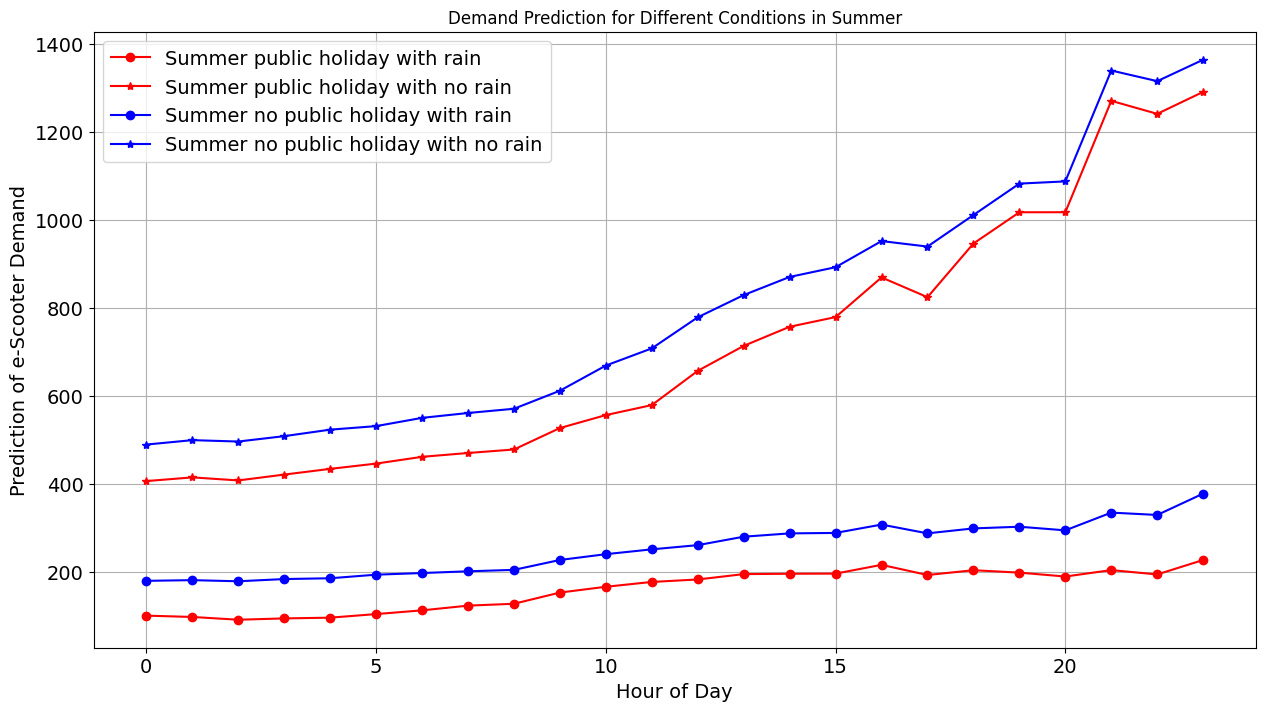

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(output_predict_summer_publichol_rain[:,0], output_predict_summer_publichol_rain[:, 1], 'ro-', label='Summer public holiday with rain')
plt.plot(output_predict_summer_publichol_norain[:,0], output_predict_summer_publichol_norain[:, 1], 'r*-', label='Summer public holiday with no rain')

plt.plot(output_predict_summer_nopublichol_rain[:,0], output_predict_summer_nopublichol_rain[:, 1], 'bo-', label='Summer no public holiday with rain')
plt.plot(output_predict_summer_nopublichol_norain[:,0], output_predict_summer_nopublichol_norain[:, 1], 'b*-', label='Summer no public holiday with no rain')

plt.grid()
plt.xlabel('Hour of Day')
plt.ylabel('Prediction of e-Scooter Demand')
plt.title('Demand Prediction for Different Conditions in Summer')
plt.legend()
plt.show()

# Comparison between actual data 2

In the winter data prediction, it's evident that there's notably reduced e-scooter demand compared to summer, presumably due to unfavourable weather conditions. Despite this difference, the overall trend remains consistent with summer patterns, with lower counts during rainy periods and higher counts on non-public holidays.

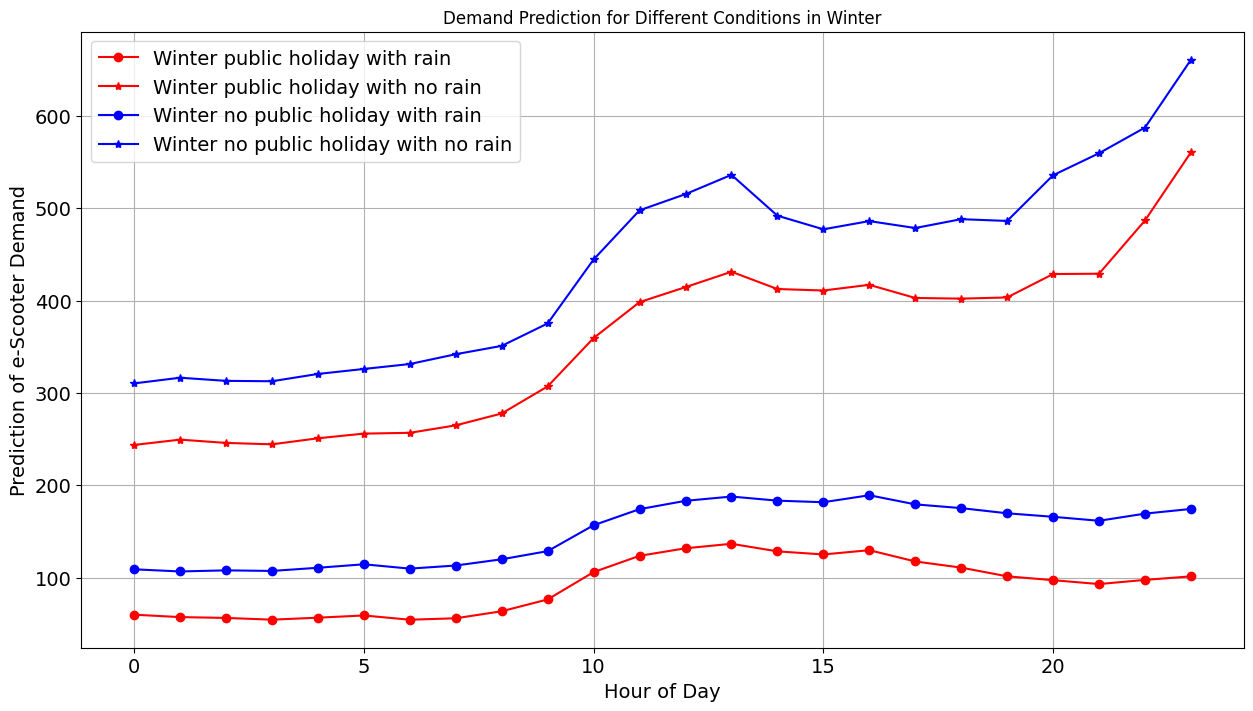

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(output_predict_winter_publichol_rain[:,0], output_predict_winter_publichol_rain[:, 1], 'ro-', label='Winter public holiday with rain')
plt.plot(output_predict_winter_publichol_norain[:,0], output_predict_winter_publichol_norain[:, 1], 'r*-', label='Winter public holiday with no rain')

plt.plot(output_predict_winter_nopublichol_rain[:,0], output_predict_winter_nopublichol_rain[:, 1], 'bo-', label='Winter no public holiday with rain')
plt.plot(output_predict_winter_nopublichol_norain[:,0], output_predict_winter_nopublichol_norain[:, 1], 'b*-', label='Winter no public holiday with no rain')

plt.grid()
plt.xlabel('Hour of Day')
plt.ylabel('Prediction of e-Scooter Demand')
plt.title('Demand Prediction for Different Conditions in Winter')
plt.legend()
plt.show()

# Final discussion
However, it is worth noting an anomaly in the plot: the prediction at 00:00 and 23:00 should ideally connect seamlessly since there's only an hours difference between the two points. This can be seen by the plot created in excel below.

This discrepancy may be due to the accuracy of the model. For example, the R-square value is around 65, which suggests that around 65% of the variance in the data is explained by the model, leaving 35% room for error that could influence the predictions. Firstly this model doesn't consider the interactions beteen the different features, such as temperature and humidity. Secondly, the e-scooter useage could be influenced by some other factors, such as unexpected events or fluctuations in user behaviour.

Therefore, while the overall trend may align with expectations, these discrepancies highlight the need for further refinement of the predictive model to improve accuracy and reliability.

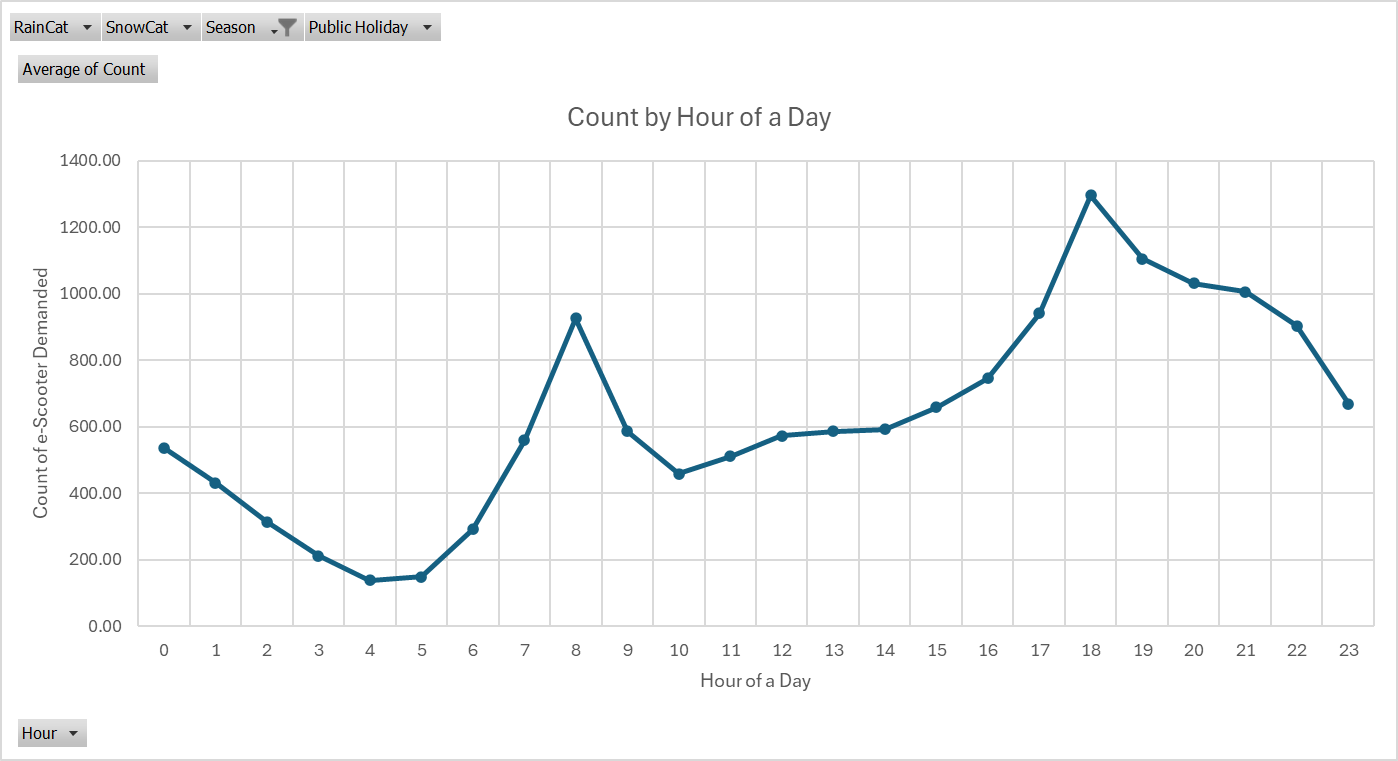